## JSON

# JSON - Javascript Object Notation
#### Invented by Douglas Crockford when working at Yahoo in early 2000s.

* Goal - Human Readable, Machine Parsable

* Specification: https://www.json.org/

JSON — short for JavaScript Object Notation — format for sharing data. 

JSON is derived from the JavaScript programming language

Available for use by many languages including Python 

usually file extension is .json when stored



In [ ]:
# Sample JSON below from https://json.org/example.html
# Question why is Syntax highlighting working properly ? :)

In [1]:
{"widget": {
    "debug": "on",
    "window": {
        "title": "Sample Konfabulator Widget",
        "name": "main_window",
        "width": 500,
        "height": 500
    },
    "image": { 
        "src": "Images/Sun.png",
        "name": "sun1",
        "hOffset": 250,
        "vOffset": 250,
        "alignment": "center"
    },
    "text": {
        "data": "Click Here",
        "size": 36,
        "style": "bold",
        "name": "text1",
        "hOffset": 250,
        "vOffset": 100,
        "alignment": "center",
        "onMouseUp": "sun1.opacity = (sun1.opacity / 100) * 90;"
    }
}}    


{'widget': {'debug': 'on',
  'window': {'title': 'Sample Konfabulator Widget',
   'name': 'main_window',
   'width': 500,
   'height': 500},
  'image': {'src': 'Images/Sun.png',
   'name': 'sun1',
   'hOffset': 250,
   'vOffset': 250,
   'alignment': 'center'},
  'text': {'data': 'Click Here',
   'size': 36,
   'style': 'bold',
   'name': 'text1',
   'hOffset': 250,
   'vOffset': 100,
   'alignment': 'center',
   'onMouseUp': 'sun1.opacity = (sun1.opacity / 100) * 90;'}}}

In [2]:
# if this was string starting with { it would be our json
mydata = {
    "firstName": "Jane",
    "lastName": "Doe",
    "hobbies": ["running", "sky diving", "dancing"],
    "age": 43,
    "children": [
        {
            "firstName": "Alice",
            "age": 7
        },
        {
            "firstName": "Bob",
            "age": 13
        }
    ]
}

In [3]:
# now mydata is just a Python dictionary nothing to do with JSON 
# here we converted JSON text into Python dictionary
type(mydata)

dict

In [4]:
# reminder that Python dictionary is just a collection of unordered key value pairs

In [5]:
print(mydata) # this is not JSON anymore this is just a Python dictionary(could have come from another source not only JSON)

{'firstName': 'Jane', 'lastName': 'Doe', 'hobbies': ['running', 'sky diving', 'dancing'], 'age': 43, 'children': [{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]}


In [ ]:
# so mydata is just a Python dictionary nothing to do with JSON anymore
# mydata contains keys and values
# some of the values are strings, some are integers, some are lists, some are dictionaries
# and some lists contain dictionaries and some dictionaries contain lists
# it is very common for data obtained from JSON to be nested - hierarchically structured

In [6]:
mydata['children'] # we use key to get value in this case we get a list

[{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]

In [7]:
type(mydata['children']) # when you see square brackets in json expect a list in Python

list

In [8]:
# we can get the first child from the list
mydata['children'][0] # remember indexing starts with 0

{'firstName': 'Alice', 'age': 7}

In [9]:
type(mydata['children'][0]) # so first item in the list is another dictionary

dict

In [10]:
mydata['children'][0]['age'] # we can get the age of the first child by using key

7

In [12]:
mydata.keys()  # outer dictionary has 5 keys

dict_keys(['firstName', 'lastName', 'hobbies', 'age', 'children'])

In [11]:
mydata['children'][0].keys() # inner dictionary has 2 keys

dict_keys(['firstName', 'age'])

In [ ]:
mydata['children'][0]['firstName'] 
# so how do we know there is name, well we had to investiage the structure first


'Alice'

In [ ]:
mydata['children'][0].keys()

dict_keys(['firstName', 'age'])

In [13]:
# so for random dictionary we could have printed everything for 2nd child with
for key, value in mydata['children'][1].items(): # 1 because indexing starts with 0
    print(key, "::", value)

firstName :: Bob
age :: 13


In [14]:
for key, value in mydata.items():
    print(key, "::", value)

firstName :: Jane
lastName :: Doe
hobbies :: ['running', 'sky diving', 'dancing']
age :: 43
children :: [{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]


In [ ]:
# so one of the issues with dealing with data extraced from deeply nested JSON is that
# you have to know the structure of the data before you can access it
# even then you can't flatten it out into a table without some concessions

In [15]:
mydata['children'][-1]['age']

13

In [16]:
# remember for dictionaries get method will not throw an error if key is not found
mydata.get('hobbies') # get has the default value None if the key is not found

['running', 'sky diving', 'dancing']

In [17]:
mydata["car"] # bad key will throw an error so get would be a bit safer

KeyError: 'car'

In [18]:
mydata.get("car") # gives us None if not found

In [ ]:
# JSON does not require any specific order of keys
# no specific structure of data - convenient but not always easy to work with

In [20]:
mydata.get('hobbies')[-1],mydata['hobbies'][-1],mydata['hobbies'][2]  # so 3 ways to access the same item

('dancing', 'dancing', 'dancing')

In [ ]:
# list has no get [1,2,3].get(2) get is dictionary specific not for lists!

In [ ]:
{"a":43,"b":30}.get("b")

30

In [ ]:
# until now we have been dealing with data stored in a dictionary
# now we are going to write data to a file in JSON format

The process of encoding JSON is usually called serialization. This term refers to the transformation of data into a series of bytes (hence serial) to be stored or transmitted across a network. You may also hear the term marshaling, but that’s a whole other discussion. Naturally, deserialization is the reciprocal process of decoding data that has been stored or delivered in the JSON standard.

All we’re talking about here is reading and writing. Think of it like this: encoding is for writing data to disk, while decoding is for reading data into memory.
 https://realpython.com/python-json/

In [19]:
mydata # simply a PYthon dictionary with some lists inside etc

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13}]}

In [20]:
# we need a library for decoding and encoding json
# json is built into any standard Python installation
import json

In [21]:
# first we are going to dump our data into a text file
# we will use with context manager to open and close the file for safety
with open("data_file.json", mode="w") as write_file: # w means write
    json.dump(mydata, write_file)
# remember that stream is closed here and file is written by now

In [22]:
# this will be nicer for humans to read
with open("data_file_indented.json", mode="w") as write_file:
    json.dump(mydata, write_file, indent=4) # so mydata could be aANY standard python data structure

In [24]:
# again .json files are just text files
# so if we read the file we will get a string
with open("data_file_indented.json") as f:
    raw_txt = f.read()
raw_txt[:150] # so again raw JSON is just text

'{\n    "firstName": "Jane",\n    "lastName": "Doe",\n    "hobbies": [\n        "running",\n        "sky diving",\n        "dancing"\n    ],\n    "age": 43,\n  '

In [25]:
type(raw_txt)

str

In [26]:
print(raw_txt)

{
    "firstName": "Jane",
    "lastName": "Doe",
    "hobbies": [
        "running",
        "sky diving",
        "dancing"
    ],
    "age": 43,
    "children": [
        {
            "firstName": "Alice",
            "age": 7
        },
        {
            "firstName": "Bob",
            "age": 13
        }
    ]
}


In [ ]:
# deserialization - converting JSON text into Python(or other programming language) data structure
# why would you want to do that?
# because you want to work with the data in Python - and working with strings is not very convenient
# we want the structure of the data to be preserved

In [27]:
# deserialize, decode from json string into Python Data structure
my_data = json.loads(raw_txt) # raw_txt is a string
type(my_data)

dict

In [28]:
my_data.keys()

dict_keys(['firstName', 'lastName', 'hobbies', 'age', 'children'])

In [29]:
my_data['children']

[{'firstName': 'Alice', 'age': 7}, {'firstName': 'Bob', 'age': 13}]

In [30]:
charlie = {'age': 14, 'firstName': 'Čarlijs'}  # new dictionary  with 2 keys-value pairs
charlie  #this dictionary is not in JSON format, it is not related to JSON at all

{'age': 14, 'firstName': 'Čarlijs'}

In [31]:
type(my_data['children'])

list

In [32]:
my_data['children'].append(charlie)

In [33]:
my_data

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13},
  {'age': 14, 'firstName': 'Čarlijs'}]}

In [34]:
my_data['hobbies'].append('šahs')  #šahs - chess in Latvian
my_data

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing', 'šahs'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13},
  {'age': 14, 'firstName': 'Čarlijs'}]}

In [35]:
my_data["car"] = "Ņiva" # i am trying to make a point about Unicode
my_data

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing', 'šahs'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13},
  {'age': 14, 'firstName': 'Čarlijs'}],
 'car': 'Ņiva'}

In [36]:
# so i will save the freshly updated data to a file
# not everything is in English!
with open("data_file_indented_ascii.json", mode="w") as f_stream:
    json.dump(my_data, f_stream, indent=4)

In [37]:
# so if we want to save in Unicode in UTF-8 encoding we need to specify it
# this is the recipe to use if you want to save in Unicode
with open("data_file_indented_unicode.json", mode="w", encoding="UTF-8") as f_stream:
    json.dump(my_data, f_stream, indent=4, ensure_ascii=False) # I want to see Unicode 

In [ ]:
# three are no strict restriction on what we append to our lists 
# in the previous example I could have added a number or another list, not necessarily a string


In [43]:
# more often we will load json immediately
with open("data_file_indented_unicode.json", encoding="utf-8") as file_stream:
    my_data_2 = json.load(file_stream) # if json is malformed then you will get some sort of error
type(my_data_2)

dict

In [44]:
my_data_2

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing', 'šahs'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13},
  {'age': 14, 'firstName': 'Čarlijs'}],
 'car': 'Ņiva'}

In [45]:
# contents are the same but two different objects
# contents are equal but not the same
# like two shopping bags with the same contents, same milk, same bread, same eggs
my_data == my_data_2, my_data is my_data_2

(True, False)

In [46]:
my_json_string = json.dumps(my_data) # converst Python data structure into json string
my_json_string[:100]

'{"firstName": "Jane", "lastName": "Doe", "hobbies": ["running", "sky diving", "dancing", "\\u0161ahs"'

In [47]:
json.dumps("Kaķis") # so non english characters get encoded into unicode special codes

'"Ka\\u0137is"'

In [48]:
json.dumps("Kaķis", ensure_ascii=False) # so now we can see non-English

'"Kaķis"'

In [ ]:
ord("ķ"),chr(1*16*16+3*16+7) # that's how hexadecimal coding works

(311, 'ķ')

In [ ]:
type(my_json_string)

str

In [ ]:
json.loads(my_json_string)

{'firstName': 'Jane',
 'lastName': 'Doe',
 'hobbies': ['running', 'sky diving', 'dancing'],
 'age': 43,
 'children': [{'firstName': 'Alice', 'age': 7},
  {'firstName': 'Bob', 'age': 13}]}

In [ ]:
json.dumps(my_data)

'{"firstName": "Jane", "lastName": "Doe", "hobbies": ["running", "sky diving", "dancing"], "age": 43, "children": [{"firstName": "Alice", "age": 7}, {"firstName": "Bob", "age": 13}]}'

In [43]:
with open("data_file_indented_unicode.json", encoding="UTF-8") as file_stream:
  loaded_data = json.load(file_stream)
loaded_data

{'age': 43,
 'car': 'Ņiva',
 'children': [{'age': 7, 'firstName': 'Alice'},
  {'age': 13, 'firstName': 'Bob'},
  {'age': 14, 'firstName': 'Čarlijs'}],
 'firstName': 'Jane',
 'hobbies': ['running', 'sky diving', 'dancing', 'boxing'],
 'lastName': 'Doe'}

In [ ]:
# there is a mapping of Python data types to JSON data types
# Python data type  JSON data type
# dict              object
# list, tuple       array
# str               string
# int, float        number
# True              true
# False             false
# None              null

# notice that JSON is more limited than Python
# not everything can be converted to JSON without loss of information
# for example tuples are converted to lists and you can't tell the difference

# another limitation is that JSON does not allow for comments!
# there have been recommendations to use JSON5 but it is not widely adopted

In [44]:
import requests # this library is not included with Python but is very popular and comes with Anaconda
# pip install requests otherwise

In [45]:
url = "https://jsonplaceholder.typicode.com/users"
response = requests.get(url)
print(response.status_code) # Response Code 200 is good

200


In [64]:
print(response.text)

[
  {
    "id": 1,
    "name": "Leanne Graham",
    "username": "Bret",
    "email": "Sincere@april.biz",
    "address": {
      "street": "Kulas Light",
      "suite": "Apt. 556",
      "city": "Gwenborough",
      "zipcode": "92998-3874",
      "geo": {
        "lat": "-37.3159",
        "lng": "81.1496"
      }
    },
    "phone": "1-770-736-8031 x56442",
    "website": "hildegard.org",
    "company": {
      "name": "Romaguera-Crona",
      "catchPhrase": "Multi-layered client-server neural-net",
      "bs": "harness real-time e-markets"
    }
  },
  {
    "id": 2,
    "name": "Ervin Howell",
    "username": "Antonette",
    "email": "Shanna@melissa.tv",
    "address": {
      "street": "Victor Plains",
      "suite": "Suite 879",
      "city": "Wisokyburgh",
      "zipcode": "90566-7771",
      "geo": {
        "lat": "-43.9509",
        "lng": "-34.4618"
      }
    },
    "phone": "010-692-6593 x09125",
    "website": "anastasia.net",
    "company": {
      "name": "Deckow-Crist

In [65]:
users = response.json() # this will work if we requested a JSON resource (NOT HTML!!)
type(users)

list

In [66]:
users[-1] # last user

{'address': {'city': 'Lebsackbury',
  'geo': {'lat': '-38.2386', 'lng': '57.2232'},
  'street': 'Kattie Turnpike',
  'suite': 'Suite 198',
  'zipcode': '31428-2261'},
 'company': {'bs': 'target end-to-end models',
  'catchPhrase': 'Centralized empowering task-force',
  'name': 'Hoeger LLC'},
 'email': 'Rey.Padberg@karina.biz',
 'id': 10,
 'name': 'Clementina DuBuque',
 'phone': '024-648-3804',
 'username': 'Moriah.Stanton',
 'website': 'ambrose.net'}

In [67]:
type(users[-1]) # will be a dictionary

dict

In [68]:
users[-1]['name']  # a string 

'Clementina DuBuque'

In [ ]:
# how could we get first and last?

In [69]:
last_user_names = users[-1]['name']
last_user_names

'Clementina DuBuque'

In [70]:
name_list = last_user_names.split(" ")
name_list

['Clementina', 'DuBuque']

In [71]:
first_name = name_list[0]
last_name = name_list[-1]
first_name, last_name

('Clementina', 'DuBuque')

In [73]:
lat = users[-1]['address']['geo']['lat'] # so we have 3 levels of dictionaries here!!
lat # it is a string 

'-38.2386'

In [74]:
lat = float(lat)
lat # now it is a number, floating (with a comma)

-38.2386

In [75]:
# we make a http request to a url and print the response code
# url stands for uniform resource locator
url = "https://my.api.mockaroo.com/ageincluded.json?key=58227cb0"
response = requests.get(url)
print(response.status_code) # Response Code 200 is good!

200


### List of HTTP codes 
* 200 is OK - everything is as expected, we asked for resource and we got it
* the most famous is 404 code for not found, most likely from typos or resource missing
* https://en.wikipedia.org/wiki/List_of_HTTP_status_codes

In [76]:
response.text[:50]

'[{"id":1,"first_name":"Kikelia","last_name":"Pagit'

In [77]:
data_from_json = response.json() # we do not need json.loads
type(data_from_json), len(data_from_json)

(list, 100)

In [78]:
my_mock_data = json.loads(response.text) # kind of useless since we have response.json()
type(my_mock_data), len(my_mock_data)

(list, 100)

In [79]:
data_from_json == my_mock_data, data_from_json is my_mock_data 
# again data is the same, but 2 different objects

(True, False)

In [80]:
print(my_mock_data[:5])  # print first 5 entries

[{'id': 1, 'first_name': 'Kikelia', 'last_name': 'Pagitt', 'email': 'kpagitt0@harvard.edu', 'gender': 'Female', 'ip_address': '77.182.208.236', 'age': 50}, {'id': 2, 'first_name': 'Eartha', 'last_name': 'Bartram', 'email': 'ebartram1@etsy.com', 'gender': 'Agender', 'ip_address': '241.72.95.21', 'age': 38}, {'id': 3, 'first_name': 'Tildie', 'last_name': 'Tellenbroker', 'email': 'ttellenbroker2@surveymonkey.com', 'gender': 'Agender', 'ip_address': '225.183.15.167', 'age': 82}, {'id': 4, 'first_name': 'Frederico', 'last_name': 'McBrady', 'email': 'fmcbrady3@yellowpages.com', 'gender': 'Polygender', 'ip_address': '233.212.168.175', 'age': 59}, {'id': 5, 'first_name': 'Red', 'last_name': 'McCurdy', 'email': 'rmccurdy4@clickbank.net', 'gender': 'Non-binary', 'ip_address': '201.180.201.13', 'age': 94}]


In [83]:
age_list = [person["age"] for person in my_mock_data]
age_list

[50,
 38,
 82,
 59,
 94,
 5,
 93,
 22,
 11,
 74,
 15,
 43,
 18,
 53,
 60,
 73,
 39,
 57,
 48,
 23,
 18,
 17,
 89,
 19,
 8,
 82,
 33,
 65,
 92,
 10,
 79,
 2,
 87,
 74,
 81,
 72,
 8,
 61,
 32,
 81,
 16,
 11,
 66,
 64,
 59,
 77,
 99,
 70,
 32,
 86,
 85,
 10,
 80,
 86,
 72,
 69,
 19,
 68,
 40,
 87,
 16,
 80,
 16,
 61,
 78,
 89,
 76,
 52,
 64,
 2,
 33,
 59,
 25,
 67,
 97,
 52,
 82,
 12,
 62,
 40,
 42,
 57,
 49,
 75,
 36,
 61,
 31,
 82,
 97,
 64,
 52,
 31,
 65,
 36,
 61,
 99,
 67,
 47,
 11,
 21]

In [84]:
average_age = sum(age_list)/len(age_list)
average_age

53.1

In [81]:
import pandas as pd # Anaconda includes by default think of Excel on steroids

In [88]:
df = pd.read_json(url) # so includes parsing
df.head()

,id,first_name,last_name,email,gender,ip_address,age
0,1,Tamqrah,Simonini,tsimonini0@boston.com,Polygender,233.230.155.243,48
1,2,Dotty,Smewing,dsmewing1@i2i.jp,Genderfluid,20.80.140.129,62
2,3,Freeland,De Gowe,fdegowe2@ucsd.edu,Agender,207.53.21.146,68
3,4,Adamo,Reaman,areaman3@over-blog.com,Female,131.179.15.197,87
4,5,Marthe,Clinning,mclinning4@tripadvisor.com,Female,38.111.4.166,2


In [86]:
df.to_csv("mock_data.csv") # could go back to json, or perhaps xlsx or other formats such as database

In [91]:
df.to_excel("mock_data.xlsx")

In [89]:
df.age.mean()

53.29

In [90]:
df.gender.value_counts()

Agender        18
Male           16
Female         14
Genderfluid    13
Polygender     11
Non-binary     10
Bigender       10
Genderqueer     8
Name: gender, dtype: int64

In [53]:
data_from_json[:2]

[{'address': {'city': 'Gwenborough',
   'geo': {'lat': '-37.3159', 'lng': '81.1496'},
   'street': 'Kulas Light',
   'suite': 'Apt. 556',
   'zipcode': '92998-3874'},
  'company': {'bs': 'harness real-time e-markets',
   'catchPhrase': 'Multi-layered client-server neural-net',
   'name': 'Romaguera-Crona'},
  'email': 'Sincere@april.biz',
  'id': 1,
  'name': 'Leanne Graham',
  'phone': '1-770-736-8031 x56442',
  'username': 'Bret',
  'website': 'hildegard.org'},
 {'address': {'city': 'Wisokyburgh',
   'geo': {'lat': '-43.9509', 'lng': '-34.4618'},
   'street': 'Victor Plains',
   'suite': 'Suite 879',
   'zipcode': '90566-7771'},
  'company': {'bs': 'synergize scalable supply-chains',
   'catchPhrase': 'Proactive didactic contingency',
   'name': 'Deckow-Crist'},
  'email': 'Shanna@melissa.tv',
  'id': 2,
  'name': 'Ervin Howell',
  'phone': '010-692-6593 x09125',
  'username': 'Antonette',
  'website': 'anastasia.net'}]

In [54]:
df2 = pd.DataFrame(data_from_json) # in this data_from_json is Python data structure list
df2.head()

,id,name,username,email,address,phone,website,company
0,1,Leanne Graham,Bret,Sincere@april.biz,"{'street': 'Kulas Light', 'suite': 'Apt. 556',...",1-770-736-8031 x56442,hildegard.org,"{'name': 'Romaguera-Crona', 'catchPhrase': 'Mu..."
1,2,Ervin Howell,Antonette,Shanna@melissa.tv,"{'street': 'Victor Plains', 'suite': 'Suite 87...",010-692-6593 x09125,anastasia.net,"{'name': 'Deckow-Crist', 'catchPhrase': 'Proac..."
2,3,Clementine Bauch,Samantha,Nathan@yesenia.net,"{'street': 'Douglas Extension', 'suite': 'Suit...",1-463-123-4447,ramiro.info,"{'name': 'Romaguera-Jacobson', 'catchPhrase': ..."
3,4,Patricia Lebsack,Karianne,Julianne.OConner@kory.org,"{'street': 'Hoeger Mall', 'suite': 'Apt. 692',...",493-170-9623 x156,kale.biz,"{'name': 'Robel-Corkery', 'catchPhrase': 'Mult..."
4,5,Chelsey Dietrich,Kamren,Lucio_Hettinger@annie.ca,"{'street': 'Skiles Walks', 'suite': 'Suite 351...",(254)954-1289,demarco.info,"{'name': 'Keebler LLC', 'catchPhrase': 'User-c..."


In [55]:
# idea get average age of Japanese Men in our JSON data



In [56]:
data_from_json[:5]

[{'address': {'city': 'Gwenborough',
   'geo': {'lat': '-37.3159', 'lng': '81.1496'},
   'street': 'Kulas Light',
   'suite': 'Apt. 556',
   'zipcode': '92998-3874'},
  'company': {'bs': 'harness real-time e-markets',
   'catchPhrase': 'Multi-layered client-server neural-net',
   'name': 'Romaguera-Crona'},
  'email': 'Sincere@april.biz',
  'id': 1,
  'name': 'Leanne Graham',
  'phone': '1-770-736-8031 x56442',
  'username': 'Bret',
  'website': 'hildegard.org'},
 {'address': {'city': 'Wisokyburgh',
   'geo': {'lat': '-43.9509', 'lng': '-34.4618'},
   'street': 'Victor Plains',
   'suite': 'Suite 879',
   'zipcode': '90566-7771'},
  'company': {'bs': 'synergize scalable supply-chains',
   'catchPhrase': 'Proactive didactic contingency',
   'name': 'Deckow-Crist'},
  'email': 'Shanna@melissa.tv',
  'id': 2,
  'name': 'Ervin Howell',
  'phone': '010-692-6593 x09125',
  'username': 'Antonette',
  'website': 'anastasia.net'},
 {'address': {'city': 'McKenziehaven',
   'geo': {'lat': '-68.61

In [57]:
myjson = data_from_json # just an alias

In [58]:
japanese = [person for person in myjson if person.get('email').endswith('.jp')]
# person is something I made up for the list comprehension above
# potentially person.get('email') could return None then .endswith('.jp') would fail with error
japanese

[]

In [59]:
japanese_men = [p for p in japanese if p.get('gender') == "Male"]
# potentially person.get('email') could return None then .endswith('.jp') would fail with error
japanese_men

[]

In [60]:
uk = [person for person in myjson if person.get('email',"").endswith('.uk')]
# we added "" to get so that if there is no email the endswith does not fail
uk

[]

In [61]:
uk_ages = [(person.get('first_name'),int(person.get('age'))) for person in uk]
uk_ages

[]

In [62]:
uk_frame = df2[df2.email.str.endswith(".uk")]
uk_frame

,id,name,username,email,address,phone,website,company


In [63]:
uk_frame.age.describe() # so we can get some statistics for pretty much free

AttributeError: ignored

In [ ]:
age_sum = 0
for person in uk_ages:
    age_sum += person[1] # becauseuk ages are in format Name and age, so 2nd item is age with index 1
print("Average age in UK is:", age_sum/len(uk_ages))

In [ ]:
jp_ages = [(person.get('first_name'),int(person.get('age'))) for person in japanese]
jp_ages

In [ ]:
with open("uk_ages.json", mode="w") as fstream:
    json.dump(uk_ages, fstream, indent=4)

In [ ]:
# so we lose the tuple designed when writing to JSON and back
with open("uk_ages.json") as fstream:
    uk_data = json.load(fstream)
uk_data

In [ ]:
with open("jp_ages.json", mode="w") as fstream:
    json.dump(jp_ages, fstream, indent=4)

In [ ]:
df2.head() 

In [ ]:
df2.describe(include="O") # we can get some statistics on our strings and objects

In [ ]:
df2.describe() # for number analysis

In [ ]:
# so Hayward is the most common first name with 2, and 52 Males and 48 Females

In [ ]:
type(mydata)

In [ ]:
type(json_string)

In [ ]:
type(mydata)

In [ ]:
# Convert Json_string back to our Python Object
my_obj = json.loads(json_string)
my_obj

In [ ]:
my_obj.get('firstName')

In [ ]:
mydata

In [ ]:
newlist = json.loads('[1,3,5,"Valdis"]')
newlist

In [ ]:
type(newlist)

In [ ]:
badlist = json.loads('[1,3,5,"Vald]",334342]')
badlist

In [ ]:
type(json_string)

In [ ]:
# Avove example JSON and Python object have the same syntax but there are some differences

![object](https://github.com/ValRCS/Digital_Discourse_ETH713_Fall_2020/blob/main/img/object.png?raw=1)

![Array](https://github.com/ValRCS/Digital_Discourse_ETH713_Fall_2020/blob/main/img/array.png?raw=1)

![Value](https://github.com/ValRCS/Digital_Discourse_ETH713_Fall_2020/blob/main/img/value.png?raw=1)

Simple Python objects are translated to JSON according to a fairly intuitive conversion.

Python	JSON

dict	object

list, tuple	array

str	string

int, long, 

float	number

True	true

False	false

None	null

In [ ]:
newlist = json.loads('[true,2,null, false, 555.333]')
newlist

In [ ]:
# The first option most people want to change is whitespace. You can use the indent keyword argument to specify the indentation size for nested structures. Check out the difference for yourself by using data, which we defined above, and running the following commands in a console:

json.dumps(mydata)


In [ ]:
# very useful for visibility!
print(json.dumps(mydata, indent=4))

In [ ]:
with open("data_file.json", "w") as write_file:
    json.dump(mydata, write_file, indent=4)

In [ ]:
# how to read json into our python data obj from file
with open("data_file.json", "r") as read_file:
    data = json.load(read_file)
data

In [ ]:
type(data)

In [ ]:
len(data)

In [ ]:
list(data.items())

In [ ]:
numberedlist = list(enumerate(data.items()))
numberedlist

In [ ]:
# save numberedlist with ident = 4 in file numberedlist.json
with open('numberedlist.json', mode='w') as f:
    json.dump(numberedlist, f, indent=4)


Keep in mind that the result of this method could return any of the allowed data types from the conversion table. This is only important if you’re loading in data you haven’t seen before. In most cases, the root object will be a dict or a list.

If you've gotten JSON data in from another program or have otherwise obtained a string of JSON formatted data in Python, you can easily deserialize that with loads(), which naturally loads from a string:

In [ ]:
json_string = """
{
    "researcher": {
        "name": "Ford Prefect",
        "species": "Betelgeusian",
        "relatives": [
            {
                "name": "Zaphod Beeblebrox",
                "species": "Betelgeusian"
            }
        ]
    }
}
"""
data = json.loads(json_string)
data

In [ ]:
# get value of relative's name
data['researcher']

In [ ]:
# get value of relative's name
data['researcher']['relatives']

In [ ]:
# get value of relative's name
data['researcher']['relatives'][0]

In [ ]:
# get value of relative's name
data['researcher']['relatives'][0]['name']

In [ ]:
data['researcher']['relatives'][0]['name'].split()[0]

In [ ]:
data['researcher']['relatives'][0]['name'].split()[0][:4]

In [ ]:
type(data)

In [ ]:
import json
import requests

In [ ]:
## Lets get some data https://jsonplaceholder.typicode.com/

In [ ]:
response = requests.get("https://jsonplaceholder.typicode.com/todos")
if response.status_code != 200:
    print("Bad Response: ", response.status_code)
print(response.status_code)
todos = json.loads(response.text)


can open https://jsonplaceholder.typicode.com/todos in regular browser too..

In [ ]:
type(todos)

In [ ]:
len(todos)

In [ ]:
todos[:10]

In [ ]:
# completedworks = [el for el in todos if el['completed'] == True]
completedworks = [el for el in todos if el.get('completed') == True]
len(completedworks)

In [ ]:
completedworks[-10:]

In [ ]:
type(completedworks)

In [ ]:
users = {}
for el in completedworks:
    k = el['userId']
    if k in users:
        users[k] +=1
    else:
        users[k] = 1
users

In [ ]:
sorted(users.items(),key = lambda el: el[1], reverse=True)

In [ ]:
from collections import Counter

In [ ]:
count = Counter([el['userId'] for el in completedworks])
count.most_common()

In [ ]:
# lets do everything at once
finishedcount = Counter([el.get('userId') for el in todos if el.get('completed') == True])
finishedcount.most_common()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.bar(finishedcount.keys(), finishedcount.values())
plt.show()

In [ ]:
todos[-3:]

In [ ]:
[1,2] + [3,4,6,6]

In [ ]:
todos += [{'completed':True},{'completed':True},{'completed':True},{'completed':True}]
todos[-5:]

In [ ]:
# lets do everything at once
finishedcount = Counter([el.get('userId') for el in todos if el.get('completed') == True])
finishedcount.most_common()

In [ ]:
myl = [('Valdis', 40), ('Alice',35), ('Bob', 23),('Carol',70)]

In [ ]:
# Lambda = anonymous function

In [ ]:
def myfun(el):
    return el[1]
# same as myfun = lambda el: el[1]

In [ ]:
sorted(myl, key = lambda el: el[1], reverse=True)

In [ ]:
# Exercise find out top 3 users with most tasks completed!

# TIPS
# we need some sort of structure to store these user results before finding out top 3
# at least two good data structure choices here :)
# here the simplest might actually be the best if we consider userId values


In [ ]:
todos[0]

In [ ]:
todos[0]['userId']

In [ ]:
todos[0]['completed']

In [ ]:
# Here we create a new dictionary and and count the completed works by id
newdict = {}
for todo in todos:
    if todo['completed'] == True:
        if todo['userId'] in newdict:
            newdict[todo['userId']] += 1
        else:
            newdict[todo['userId']] = 1

In [ ]:
newdict

In [ ]:
sorted(newdict.items())

In [ ]:
bestworkers = sorted(newdict.items(), key=lambda el: el[1], reverse=True)
bestworkers[:3]

In [ ]:
users = [ el['userId'] for el in todos]
len(users),users[:15]

In [ ]:
uniqusers = set(users)
uniqusers

In [ ]:
# dictionary comprehension but could live without one
users = { el['userId'] : 0 for el in todos} 

In [ ]:
users

In [ ]:
users.keys()

In [ ]:
users.value

In [ ]:
#{'completed': True,
# 'id': 8,
#  'title': 'quo adipisci enim quam ut ab',
#  'userId': 1}

In [ ]:
#idiomatic
for el in todos:
    users[el['userId']] += el['completed'] # Boolean False is 0 True is 1 obviously this might not be too readable

In [ ]:
# same as above could be useful in more complicated cases
for el in todos:
    if el['completed'] == True:
        users[el['userId']] += 1

In [ ]:
# there could be a one liner or a solution with from collections import Counter

In [ ]:
users.items()

In [ ]:
list(users.items())

In [ ]:
userlist=list(users.items())

In [ ]:
type(userlist[0])

In [ ]:
# we pass a key anonymous(lambda) function
sorted(userlist, key=lambda el: el[1], reverse=True)[:3]

In [ ]:
# lets try a simple way

In [ ]:
mylist=[0]
mylist*=11

In [ ]:
for el in todos:
    if el['completed'] == True:
        mylist[el['userId']] +=1

In [ ]:
mylist

In [ ]:
mylist.index(max(mylist))

In [ ]:
# kind of hard to get more values need to get tricky

# How about Pandas and Json ?

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_json('https://jsonplaceholder.typicode.com/todos')

In [ ]:
df.head()

,userId,id,title,completed
0,1,1,delectus aut autem,False
1,1,2,quis ut nam facilis et officia qui,False
2,1,3,fugiat veniam minus,False
3,1,4,et porro tempora,True
4,1,5,laboriosam mollitia et enim quasi adipisci qui...,False


In [ ]:
df.to_csv('my_todos.csv')

In [ ]:
df.shape

(200, 4)

In [ ]:
df.describe()

,userId,id
count,200.000000,200.000000
mean,5.500000,100.500000
std,2.879489,57.879185
min,1.000000,1.000000
25%,3.000000,50.750000
50%,5.500000,100.500000
75%,8.000000,150.250000
max,10.000000,200.000000


In [ ]:
df.describe(include=['O'])

,title
count,200
unique,200
top,occaecati adipisci est possimus totam
freq,1


In [ ]:
# we see that completed
df.groupby(['userId']).sum()

,id,completed
userId,,
1,210,11.0
2,610,8.0
3,1010,7.0
4,1410,6.0
5,1810,12.0
6,2210,6.0
7,2610,9.0
8,3010,11.0
9,3410,8.0


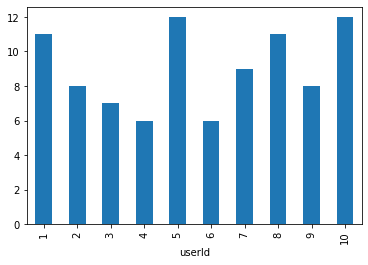

In [ ]:
df.groupby(['userId']).sum()['completed'].plot(kind="bar")

In [ ]:
busyjson

'{"10":12.0,"5":12.0,"8":11.0,"1":11.0,"7":9.0,"9":8.0,"2":8.0,"3":7.0,"6":6.0,"4":6.0}'

In [ ]:
df.groupby(['userId'])['completed'].sum()

userId
1     11.0
2      8.0
3      7.0
4      6.0
5     12.0
6      6.0
7      9.0
8     11.0
9      8.0
10    12.0
Name: completed, dtype: float64

In [ ]:
# if we need a single column dataframe
df.groupby(['userId'])[['completed']].sum()

,completed
userId,
1,11.0
2,8.0
3,7.0
4,6.0
5,12.0
6,6.0
7,9.0
8,11.0
9,8.0


In [ ]:
df.groupby(['userId'])['completed'].sum().sort_values()

userId
4      6.0
6      6.0
3      7.0
2      8.0
9      8.0
7      9.0
1     11.0
8     11.0
5     12.0
10    12.0
Name: completed, dtype: float64

In [ ]:
df.groupby(['userId'])['completed'].sum().sort_values(ascending=False)

userId
10    12.0
5     12.0
8     11.0
1     11.0
7      9.0
9      8.0
2      8.0
3      7.0
6      6.0
4      6.0
Name: completed, dtype: float64

In [ ]:
busyjson = pd.read_json('https://jsonplaceholder.typicode.com/todos').groupby(['userId'])['completed'].sum().sort_values(ascending=False).to_json()

In [ ]:
def prettyJSON(myjson):
    return json.dumps(json.loads(myjson), indent=4)

In [ ]:
type(busyjson)

str

In [ ]:
prettybusy = prettyJSON(busyjson)

In [ ]:
with open('prettybusy.json', mode='w') as f:
    f.write(prettybusy)

# Exercise Find Public JSON API get data and convert it into Pandas DataFrame

## Many possible sources

https://github.com/toddmotto/public-apis
    
### You want the ones without authorization and WITH CORS unless you are feeling adventurous and want to try with auth



In [ ]:
df = pd.read_json('https://cat-fact.herokuapp.com/facts/random?animal_type=cat&amount=50')
df.head()

,__v,_id,createdAt,deleted,source,status,text,type,updatedAt,used,user
0,0,591f98783b90f7150a19c1ab,2018-01-04T01:10:54.673Z,False,api,"{'verified': True, 'sentCount': 1}",Cats and kittens should be acquired in pairs w...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381
1,0,5955792c7b77520020799431,2018-02-23T21:20:04.118Z,False,user,"{'verified': True, 'sentCount': 1}","Cats ""knead"" because of seperation from their ...",cat,2020-08-23T20:20:01.611Z,False,595579027b77520020799430
2,0,5a038cdf8e3dbc001f719790,2018-02-01T21:20:02.808Z,False,user,"{'verified': True, 'sentCount': 1}",The ability of a cat to reflexively twist its ...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381
3,0,591f98783b90f7150a19c1da,2018-01-04T01:10:54.673Z,False,api,"{'verified': True, 'sentCount': 1}",The cat appears to be the only domestic compan...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381
4,0,591f98703b90f7150a19c15d,2018-01-04T01:10:54.673Z,False,api,"{'verified': True, 'sentCount': 1}",Most cats killed on the road are un-neutered t...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381


In [ ]:
df.columns = sorted(df.columns)
df.head()

,__v,_id,createdAt,deleted,source,status,text,type,updatedAt,used,user
0,0,591f98783b90f7150a19c1ab,2018-01-04T01:10:54.673Z,False,api,"{'verified': True, 'sentCount': 1}",Cats and kittens should be acquired in pairs w...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381
1,0,5955792c7b77520020799431,2018-02-23T21:20:04.118Z,False,user,"{'verified': True, 'sentCount': 1}","Cats ""knead"" because of seperation from their ...",cat,2020-08-23T20:20:01.611Z,False,595579027b77520020799430
2,0,5a038cdf8e3dbc001f719790,2018-02-01T21:20:02.808Z,False,user,"{'verified': True, 'sentCount': 1}",The ability of a cat to reflexively twist its ...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381
3,0,591f98783b90f7150a19c1da,2018-01-04T01:10:54.673Z,False,api,"{'verified': True, 'sentCount': 1}",The cat appears to be the only domestic compan...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381
4,0,591f98703b90f7150a19c15d,2018-01-04T01:10:54.673Z,False,api,"{'verified': True, 'sentCount': 1}",Most cats killed on the road are un-neutered t...,cat,2020-08-23T20:20:01.611Z,False,5a9ac18c7478810ea6c06381


In [ ]:
response = requests.get("https://cat-fact.herokuapp.com/facts/random?animal_type=cat&amount=50")
if response.status_code != 200:
    print("Bad Response: ", response.status_code)
print(response.status_code)
cats = json.loads(response.text)
cats[:3]

200


[{'used': False,
  'source': 'api',
  'type': 'cat',
  'deleted': False,
  '_id': '591f98783b90f7150a19c189',
  '__v': 0,
  'text': 'A cat has approximately 60 to 80 million olfactory cells (a human has between 5 and 20 million).',
  'updatedAt': '2020-08-23T20:20:01.611Z',
  'createdAt': '2018-01-04T01:10:54.673Z',
  'status': {'verified': True, 'sentCount': 1},
  'user': '5a9ac18c7478810ea6c06381'},
 {'used': False,
  'source': 'api',
  'type': 'cat',
  'deleted': False,
  '_id': '591f9858c5cbe314f7a7ad36',
  '__v': 0,
  'text': "Cats respond better to women than to men, probably due to the fact that women's voices have a higher pitch.",
  'updatedAt': '2020-08-23T20:20:01.611Z',
  'createdAt': '2018-05-18T20:20:03.088Z',
  'status': {'verified': True, 'sentCount': 1},
  'user': '5a9ac18c7478810ea6c06381'},
 {'used': False,
  'source': 'user',
  'type': 'cat',
  'deleted': False,
  '_id': '5a4d76916ef087002174c28b',
  'updatedAt': '2020-08-23T20:20:01.611Z',
  'createdAt': '2018-06-1

In [ ]:
response = requests.get("https://cat-fact.herokuapp.com/facts/random",
                        params={"animal_type":"cat", "amount":20})
if response.status_code != 200:
    print("Bad Response: ", response.status_code)
print(response.status_code)
cats = json.loads(response.text) # simpler response.json() 
cats[:3]

200


[{'used': False,
  'source': 'user',
  'type': 'cat',
  'deleted': False,
  '_id': '5c6097eee549020014533030',
  'updatedAt': '2020-08-23T20:20:01.611Z',
  'createdAt': '2019-02-10T21:30:22.033Z',
  'user': '5a9ac18c7478810ea6c06381',
  'text': 'Legend holds that the Chartreux once lived alongside the Carthusian monks of France.',
  '__v': 0,
  'status': {'verified': True, 'sentCount': 1}},
 {'used': False,
  'source': 'user',
  'type': 'cat',
  'deleted': False,
  '_id': '5c3552738e0b8d00148d45e6',
  'updatedAt': '2020-08-23T20:20:01.611Z',
  'createdAt': '2019-01-09T01:46:27.122Z',
  'user': '5a9ac18c7478810ea6c06381',
  'text': "Cat's cannot see in total darkness, however their vision is much better than a human's in semidarkness because their retinas are much more sensitive to light.",
  '__v': 0,
  'status': {'verified': True, 'sentCount': 1}},
 {'used': False,
  'source': 'api',
  'type': 'cat',
  'deleted': False,
  '_id': '591f9890d369931519ce3552',
  '__v': 0,
  'text': 'A ste

In [ ]:
len(cats)`

20

In [ ]:
response.status_code

200

In [ ]:
cats2 = response.json()
len(cats2)

20

In [ ]:
cats2 == cats, cats2 is cats 
#data are the same we just have two different copies of them

(True, False)

In [ ]:
df.loc[0, 'text']

'At 4 weeks, it is important to play with kittens so that they do not develope a fear of people.'

In [ ]:
## For authorization you generally need some sort of token(key)
# One example for zendesk API  https://develop.zendesk.com/hc/en-us/community/posts/360001652447-API-auth-in-python


# For an API token, append '/token' to your username and use the token as the password:
## This will not work for those without zendesk access token

url = 'https://your_subdomain.zendesk.com/api/v2/users/123.json'
r = requests.get(url, auth=('user@example.com/token', 'your_token'))
# For an OAuth token, set an Authorization header:

bearer_token = 'Bearer ' + access_token
header = {'Authorization': bearer_token}
url = 'https://your_subdomain.zendesk.com/api/v2/users/123.json'
r = requests.get(url, headers=header)

In [ ]:
def myReadJSON(url):
    response = requests.get(url)
    if response.status_code != 200:
        print("Bad Response: ", response.status_code)
    print("Status CODE", response.status_code)
    return json.loads(response.text)


In [ ]:
rawdrinks = myReadJSON("https://www.thecocktaildb.com/api/json/v1/1/search.php?s=margarita")
type(rawdrinks)

Status CODE 200


dict

In [ ]:
rawdrinks.keys()

dict_keys(['drinks'])

In [ ]:
mydrinks = pd.DataFrame(rawdrinks['drinks'])
mydrinks.head()

,dateModified,idDrink,strAlcoholic,strCategory,strCreativeCommonsConfirmed,strDrink,strDrinkAlternate,strDrinkDE,strDrinkES,strDrinkFR,...,strMeasure2,strMeasure3,strMeasure4,strMeasure5,strMeasure6,strMeasure7,strMeasure8,strMeasure9,strTags,strVideo
0,2015-08-18 14:42:59,11007,Alcoholic,Ordinary Drink,Yes,Margarita,None,None,None,None,...,1/2 oz,1 oz,None,None,None,None,None,None,"IBA,ContemporaryClassic",None
1,2015-08-18 14:51:53,11118,Alcoholic,Ordinary Drink,Yes,Blue Margarita,None,None,None,None,...,1 oz,1 oz,Coarse,None,None,None,None,None,None,None
2,2017-09-02 18:37:54,17216,Alcoholic,Ordinary Drink,No,Tommy's Margarita,None,None,None,None,...,1.5 cl,2 spoons,None,None,None,None,None,None,"IBA,NewEra",None
3,2015-09-02 17:00:22,16158,Alcoholic,Other/Unknown,No,Whitecap Margarita,None,None,None,None,...,2 oz,1/4 cup,3 tblsp fresh,None,None,None,None,None,None,None
4,2015-08-18 14:41:51,12322,Alcoholic,Ordinary Drink,No,Strawberry Margarita,None,None,None,None,...,1 oz,1/2 oz,1 oz,1 oz,None,None,None,None,None,None


In [ ]:
# we can Transpose to get a sense of all columns
mydrinks.head().T

,0,1,2,3,4
dateModified,2015-08-18 14:42:59,2015-08-18 14:51:53,2017-09-02 18:37:54,2015-09-02 17:00:22,2015-08-18 14:41:51
idDrink,11007,11118,17216,16158,12322
strAlcoholic,Alcoholic,Alcoholic,Alcoholic,Alcoholic,Alcoholic
strCategory,Ordinary Drink,Ordinary Drink,Ordinary Drink,Other/Unknown,Ordinary Drink
strCreativeCommonsConfirmed,No,No,No,No,No
strDrink,Margarita,Blue Margarita,Tommy's Margarita,Whitecap Margarita,Strawberry Margarita
strDrinkAlternate,None,None,None,None,None
strDrinkDE,None,None,None,None,None
strDrinkES,None,None,None,None,None
strDrinkFR,None,None,None,None,None


In [ ]:
drinks = pd.read_json("https://www.thecocktaildb.com/api/json/v1/1/search.php?s=margarita")
drinks.head()

,drinks
0,"{'idDrink': '11007', 'strDrink': 'Margarita', ..."
1,"{'idDrink': '11118', 'strDrink': 'Blue Margari..."
2,"{'idDrink': '17216', 'strDrink': 'Tommy's Marg..."
3,"{'idDrink': '16158', 'strDrink': 'Whitecap Mar..."
4,"{'idDrink': '12322', 'strDrink': 'Strawberry M..."


In [ ]:
# requests also works with post type of requests

In [ ]:
url = "http://www.recipepuppy.com/api/?i=onions,garlic&q=omelet&p=3"

In [ ]:
response = requests.get(url)
response.status_code

200

In [ ]:
o_data = response.json()
type(o_data)

dict

In [ ]:
o_recipes = o_data.get('results')
type(o_recipes)

list

In [ ]:
o_recipes[:3]

[{'title': 'Vegetable-Pasta Oven Omelet',
  'href': 'http://find.myrecipes.com/recipes/recipefinder.dyn?action=displayRecipe&recipe_id=520763',
  'ingredients': 'tomato, onions, red pepper, garlic, olive oil, zucchini, cream cheese, vermicelli, eggs, parmesan cheese, milk, italian seasoning, salt, black pepper',
  'thumbnail': 'http://img.recipepuppy.com/560556.jpg'},
 {'title': 'Roasted Pepper and Bacon Omelet',
  'href': 'http://www.bigoven.com/43919-Roasted-Pepper-and-Bacon-Omelet-recipe.html',
  'ingredients': 'eggs, salt, black pepper, butter, black pepper, bacon, onions, garlic, roasted red peppers, oregano, black pepper',
  'thumbnail': ''},
 {'title': '\nBroccoli Oven Omelet Recipe\n\n',
  'href': 'http://cookeatshare.com/recipes/broccoli-oven-omelet-92851',
  'ingredients': 'eggs, broccoli, onions, parmesan cheese, lowfat milk, salt, basil, garlic, tomato, parmesan cheese',
  'thumbnail': ''}]

In [ ]:
# for 100 suggestion is to use time.sleep(0.2)
# it is good manners to sleep a little to avoid DDOS attack on API server
import time
time.sleep(0.5) # half a second delay

In [ ]:
url = "https://data.gov.lv/dati/lv/api/3/action/datastore_search?resource_id=27fcc5ec-c63b-4bfd-bb08-01f073a52d04&limit=5"
r = requests.get(url)
r.status_code

200

In [ ]:
r.text

'{"help": "https://data.gov.lv/dati/api/3/action/help_show?name=datastore_search", "success": true, "result": {"include_total": true, "resource_id": "27fcc5ec-c63b-4bfd-bb08-01f073a52d04", "fields": [{"type": "int", "id": "_id"}, {"type": "numeric", "id": "id"}, {"type": "numeric", "id": "file_id"}, {"type": "numeric", "id": "legal_entity_registration_number"}, {"type": "text", "id": "source_schema"}, {"type": "text", "id": "source_type"}, {"type": "numeric", "id": "year"}, {"type": "timestamp", "id": "year_started_on"}, {"type": "timestamp", "id": "year_ended_on"}, {"type": "numeric", "id": "employees"}, {"type": "text", "id": "rounded_to_nearest"}, {"type": "text", "id": "currency"}, {"type": "timestamp", "id": "created_at"}], "records_format": "objects", "records": [{"_id":1,"id":709390,"file_id":16544390,"legal_entity_registration_number":40103504912,"source_schema":"DokGPUIENv1","source_type":"UGP","year":2016,"year_started_on":"2016-01-01T00:00:00","year_ended_on":"2016-12-31T00:

In [ ]:
with open("ur_yearly.json", "w", encoding="utf-8") as f:
    f.write(r.text)

In [ ]:
urdata = r.json()

In [ ]:
with open("ur_yearly_indent.json", "w", encoding="utf-8") as f:
    json.dump(r.json(), f, indent=4)

In [ ]:
type(urdata)

dict

In [ ]:
next_url = urdata['result']["_links"]["next"]
next_url

'/api/3/action/datastore_search?offset=5&limit=5&resource_id=27fcc5ec-c63b-4bfd-bb08-01f073a52d04'